# **Exploratory Data Analysis for Disney Land Reviews (Across all Branches)**


The code below represents an Exploratory Data Analysis (EDA) for the DisneyLandReviews dataset.

**We will put our code part by part and explain every part !**

 💡 The following part of the code imports the libraries and uploads the files in the way Google Colab does

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving DisneyLandReviews.xlsx to DisneyLandReviews (3).xlsx


Data cleaning : Removing duplicate values from 'Review_ID' and 'Review_Text'

In [ ]:
!pip install openpyxl
import openpyxl # Import the necessary package
disney_land_data = pd.read_excel("DisneyLandReviews.xlsx")

# Check for missing values
print("Missing values before cleaning:\n", disney_land_data.isnull().sum())

# Drop rows with missing values (if any)
disney_land_data = disney_land_data.dropna()

# Verify `review_id` is unique
if disney_land_data['Review_ID'].duplicated().sum() > 0:
    print(f"Duplicate review_ids found: {disney_land_data['Review_ID'].duplicated().sum()}")
    # Drop duplicate review_ids, keeping the first occurrence
    disney_land_data = disney_land_data.drop_duplicates(subset=['Review_ID'], keep='first') # Corrected indentation to 4 spaces

# Check if `review_text` has duplicates
duplicate_review_texts = disney_land_data[disney_land_data['Review_Text'].duplicated(keep=False)]

if not duplicate_review_texts.empty:
    print("Duplicate review_texts detected:")
    print(duplicate_review_texts[['Review_ID', 'Review_Text']])
    # Optionally inspect and remove duplicates
    disney_land_data = disney_land_data.drop_duplicates(subset=['Review_Text'], keep='first')

# Final check for uniqueness
print(f"Unique review_ids: {disney_land_data['Review_ID'].nunique()} / Total: {len(disney_land_data['Review_ID'])}")
print(f"Unique review_texts: {disney_land_data['Review_Text'].nunique()} / Total: {len(disney_land_data['Review_Text'])}")

# Optional: Reset the index after cleaning
disney_land_data = disney_land_data.reset_index(drop=True)

# Save the cleaned dataset (if needed)
# Replace 'cleaned_dataset.csv' with your desired file name
disney_land_data.to_excel('DisneyLandReviews.xlsx', index=False)

print("Data cleaning complete. Ready for analysis!")


Missing values before cleaning:
 Review_ID            0
Rating               0
Day_rev              0
Month_rev            0
Year_rev             0
Reviewer_Location    0
Review_Text          0
Branch               0
Sentiment            0
dtype: int64
Unique review_ids: 40014 / Total: 40014
Unique review_texts: 40014 / Total: 40014
Data cleaning complete. Ready for analysis!


💡 The following part of the code opens the excel file, gives us info about our data such as the non null elements count + data types, and displays the first 5 rows of our dataset

In [ ]:
# Display basic info about the dataset
print("\nDataset Info:\n")
disney_land_data.info()

# Show the first few rows of the dataset
print("\nFirst 5 Rows:\n")
disney_land_data.head()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40014 entries, 0 to 40013
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Review_ID          40014 non-null  int64  
 1   Rating             40014 non-null  int64  
 2   Day_rev            40014 non-null  int64  
 3   Month_rev          40014 non-null  int64  
 4   Year_rev           40014 non-null  int64  
 5   Reviewer_Location  40014 non-null  object 
 6   Review_Text        40014 non-null  object 
 7   Branch             40014 non-null  object 
 8   Sentiment          40014 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 2.7+ MB

First 5 Rows:



,Review_ID,Rating,Day_rev,Month_rev,Year_rev,Reviewer_Location,Review_Text,Branch,Sentiment
0,670772142,4,1,4,2019,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,0.243981
1,670682799,4,1,5,2019,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,0.236131
2,670623270,4,1,4,2019,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,0.160498
3,670607911,4,1,4,2019,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,0.189286
4,670607296,4,1,4,2019,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,0.266667


We can also show the last n rows (in this case 4)

In [ ]:
# Show the last few rows of the dataset
print("\nLast 4 Rows:\n")
disney_land_data.tail(4)


Last 4 Rows:



,Review_ID,Rating,Day_rev,Month_rev,Year_rev,Reviewer_Location,Review_Text,Branch,Sentiment
40010,92061774,4,1,1,2011,Germany,Just returned from a 4 days family trip to Dis...,Disneyland_Paris,0.198286
40011,91995748,1,1,12,2010,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Disneyland_Paris,0.020628
40012,91984642,2,1,12,2010,United Kingdom,Well I was really looking forward to this trip...,Disneyland_Paris,0.108065
40013,91827418,5,1,9,2010,United Kingdom,If staying at a Disney hotel make good use of ...,Disneyland_Paris,0.122500


## **Descriptive Statistics for Numerical columns :**

Numerical variables to work on : Rating, Month_rev, Year_rev

### **Central Tendency Analysis :**

💡 The following part of the code calculates the measures of central tendency + the minimum and the maximum for each column :
*  Mean
*  Median
*  Mode
*  Min
*  Max

We can also use .describe() to retrieve the **mean, std, min, max, and the 3 quantiles** at once ! 🧙

In [ ]:
# Calculate the central tendency measures

# Select numerical columns
numerical_columns = ['Rating','Month_rev','Year_rev']

# Compute all measures for numerical columns
central_tendency = {}
for column in numerical_columns:
  central_tendency[column] = {

    "Mean": disney_land_data[column].mean(),
    "Median": disney_land_data[column].median(),
    "Mode": disney_land_data[column].mode()[0],
    "Minimum": disney_land_data[column].min(),
    "Maximum": disney_land_data[column].max()
  }

print("\nCentral Tendency analysis:\n")
for column, measures in central_tendency.items():
  print(f"{column}:\n")
  for measure, value in measures.items():
    print(f"{measure}: {value}")
  print()

#Alternative way
disney_land_data.describe()



Central Tendency analysis:

Rating:

Mean: 4.231069125805968
Median: 5.0
Mode: 5
Minimum: 1
Maximum: 5

Month_rev:

Mean: 6.776128355075723
Median: 7.0
Mode: 8
Minimum: 1
Maximum: 12

Year_rev:

Mean: 2014.8944619383217
Median: 2015.0
Mode: 2015
Minimum: 2010
Maximum: 2019



,Review_ID,Rating,Day_rev,Month_rev,Year_rev,Sentiment
count,4.001400e+04,40014.000000,40014.0,40014.000000,40014.000000,40014.000000
mean,3.322420e+08,4.231069,1.0,6.776128,2014.894462,0.217982
std,1.605430e+08,1.052083,0.0,3.312868,2.084267,0.181946
min,9.161911e+07,1.000000,1.0,1.000000,2010.000000,-1.000000
25%,1.864202e+08,4.000000,1.0,4.000000,2013.000000,0.106882
50%,3.077122e+08,5.000000,1.0,7.000000,2015.000000,0.208790
75%,4.605488e+08,5.000000,1.0,10.000000,2016.000000,0.319859
max,6.708014e+08,5.000000,1.0,12.000000,2019.000000,1.000000


Now let's make it more structired and put our result in a dataframe ✅ Now it becomes visually appealing ⭐

In [ ]:
central_tendency_df = pd.DataFrame(central_tendency).T
central_tendency_df

,Mean,Median,Mode,Minimum,Maximum
Rating,4.231069,5.0,5.0,1.0,5.0
Month_rev,6.776128,7.0,8.0,1.0,12.0
Year_rev,2014.894462,2015.0,2015.0,2010.0,2019.0


**Interpretation :**



**1. Rating**
* **Mean** : ~4.23 mean rating accorss all reviews
* **Median** : 5 out of 5 rating, close to the mean. This indicates that the data does not have extreme outliers significantly skewing the average.
The central tendency of the ratings is consistent. ⭐
* **Mode** :  5 which is the same value as the median, close to the mean, which indicates that the most given rating is 5 out of 5.

**2. Month_rev**
* **Mean** : ~6.78 which indicates that the date of the review is given, on average , at the end of June (6th month).
* **Median** : 7 indicating July, which is very close to the mean, indicating that the data does not have extreme outliers significantly skewing the average.
The central tendency of the ratings is consistent. ⭐
* **Mode** :  8 indicating that the month with the most reviews is August. The measure is very close to the Mean and Median as well.

**3. Year_rev**
* **Mean** : ~2014.89 which indicates that reviews were given,on average,by the end of 2014.
* **Median** : 2015 which is close to the mean, indicating that the data does not have extreme outliers significantly skewing the average.
The central tendency of the ratings is consistent. ⭐
* **Mode** :  2015 which indicates that 2015 was the year with the most reviews. The measure is very close to the Mean and Median as well.


💡 The following part of the code counts the occurences of the mode value for each column :
  * Rating : 5 (out of 5)
  * Review Month : 8 (August)
  * Review Year : 2015

In [ ]:
# Function to calculate mode occurrences
def mode_occurrences(disney_land_data, column, mode_value):
    return (disney_land_data[column] == mode_value).sum()

# Calculate occurrences of specific mode values
print("\nMode Occurrences:\n")
mode_values = {
    "Rating": 5,
    "Month_rev": 8,
    "Year_rev": 2015
}

for column, mode_value in mode_values.items():
    count = mode_occurrences(disney_land_data, column, mode_value)
    print(f"Column: {column}, Mode Value: {mode_value}, Occurrences: {count}")



Mode Occurrences:

Column: Rating, Mode Value: 5, Occurrences: 21894
Column: Month_rev, Mode Value: 8, Occurrences: 3994
Column: Year_rev, Mode Value: 2015, Occurrences: 6978


**Interpretation :**

Out of 40014 visitors :

* 21894 visitors gave a 5 out of 5 rating, which makes up approximately 54.72% of the whole sample.

* 3994 visitors reviewed the park branch in August, which makes up approximately 10% of the whole sample.

* 6978 visitors reviewed the park branch in 2015, which makes up approximately 17.44% of the whole sample.

### **Dispersion Analysis :**

💡 The following part of the code calculates the measures of variability for each column :
*  Range
*  Variance
*  Standard Deviation (SD)
*  Interquartile Range (IQR)

In [ ]:
# Function to calculate Range, Variance, Standard Deviation, and IQR
def calculate_metrics(data, column):
    range_value = disney_land_data[column].max() - disney_land_data[column].min()
    variance = disney_land_data[column].var()
    std_dev = disney_land_data[column].std()
    q1 = disney_land_data[column].quantile(0.25)
    q3 = disney_land_data[column].quantile(0.75)
    iqr = q3 - q1

    return {
        "Range": range_value,
        "Variance": variance,
        "Standard Deviation": std_dev,
        "IQR": iqr
    }

# Apply metrics function to specific columns and store in a DataFrame
metrics_results = {}
for column in ['Rating', 'Month_rev', 'Year_rev']:
    metrics_results[column] = calculate_metrics(disney_land_data, column)

metrics_df = pd.DataFrame(metrics_results).T
print("\nDispersion Metrics DataFrame:\n")
metrics_df


Dispersion Metrics DataFrame:



,Range,Variance,Standard Deviation,IQR
Rating,4.0,1.106879,1.052083,1.0
Month_rev,11.0,10.975097,3.312868,6.0
Year_rev,9.0,4.344171,2.084267,3.0


In [ ]:
disney_land_data.describe()

,Review_ID,Rating,Day_rev,Month_rev,Year_rev,Sentiment
count,4.001400e+04,40014.000000,40014.0,40014.000000,40014.000000,40014.000000
mean,3.322420e+08,4.231069,1.0,6.776128,2014.894462,0.217982
std,1.605430e+08,1.052083,0.0,3.312868,2.084267,0.181946
min,9.161911e+07,1.000000,1.0,1.000000,2010.000000,-1.000000
25%,1.864202e+08,4.000000,1.0,4.000000,2013.000000,0.106882
50%,3.077122e+08,5.000000,1.0,7.000000,2015.000000,0.208790
75%,4.605488e+08,5.000000,1.0,10.000000,2016.000000,0.319859
max,6.708014e+08,5.000000,1.0,12.000000,2019.000000,1.000000


### **Visualization of trends** 📈

In this section, we plotted some graphs to begin analyzing and understanding our data.

💡 The following part of the code is a function that plots the number of reviews per a particular column that will be specified when we call the function.

In [ ]:
def plot_distribution(data, column, title, xlabel, palette='viridis'):

  plt.figure(figsize=(8, 5))
  sns.countplot(data=data, x=column, palette=palette)
  plt.title(title, fontsize=14)
  plt.xlabel(xlabel, fontsize=12)
  plt.ylabel('Number of reviews', fontsize=12)
  plt.show()

**📊  Number of Reviews per Rating :**

<ipython-input-177-60281fb03f1f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette=palette)


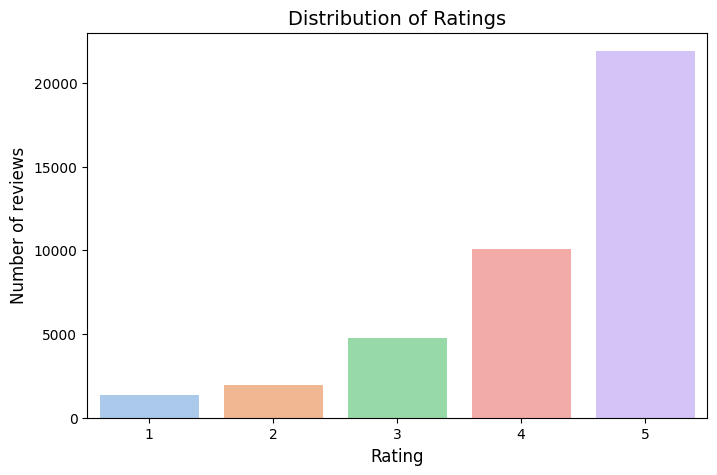

In [ ]:
#Call the function
plot_distribution(disney_land_data, 'Rating', 'Distribution of Ratings', 'Rating', palette='pastel')

**Interpretation** : 5 was the rating with the highest number of reviews (which is the mode). The graph shows that the data is concentrated on higher ratings (we'll interpret further in the next section).

**📊  Number of Reviews per Month :**

<ipython-input-177-60281fb03f1f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette=palette)


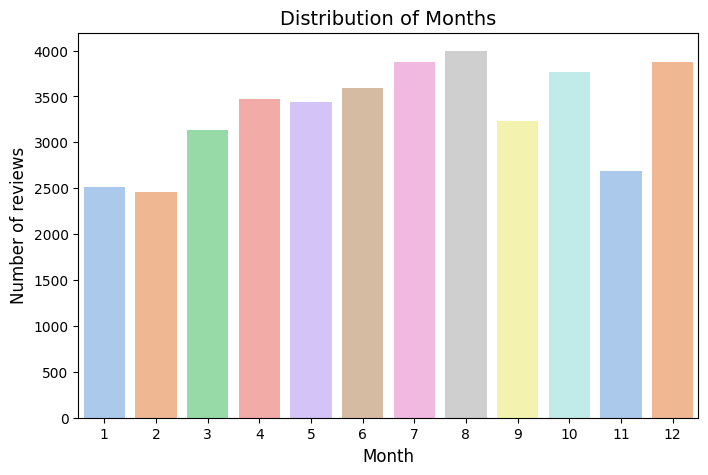

In [ ]:
plot_distribution(disney_land_data, 'Month_rev', 'Distribution of Months', 'Month', palette='pastel')

**Interpretation** : August (8th month) was the month with the highest number of reviews (which is the mode). The graph shows that the data is concentrated on the second half of the year (we'll interpret further in the next section).

**📊  Number of Reviews per Year :**

<ipython-input-177-60281fb03f1f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette=palette)


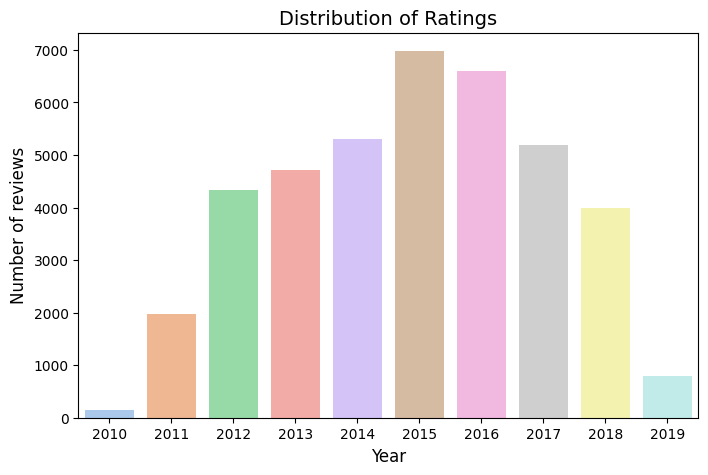

In [ ]:
plot_distribution(disney_land_data, 'Year_rev', 'Distribution of Ratings', 'Year', palette='pastel')

**Interpretation** : 2015 was the year with the highest number of reviews (which is the mode). The graph shows that the data is concentrated on the second half of the decade (we'll interpret further in the next section).

**📊  Average Rating per Year :**

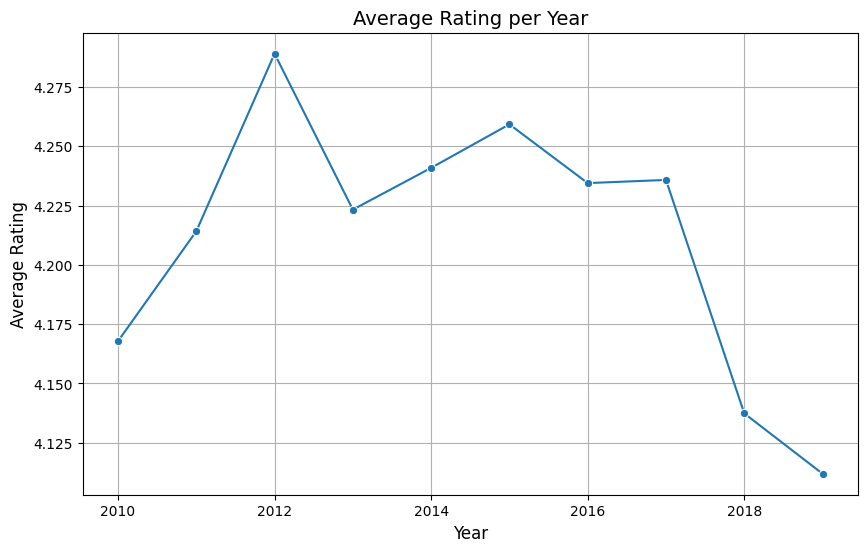

In [ ]:
# Plot 1: Lineplot showing Rating per Year
plt.figure(figsize=(10, 6))
yearly_avg_rating = disney_land_data.groupby('Year_rev')['Rating'].mean()
sns.lineplot(x=yearly_avg_rating.index, y=yearly_avg_rating.values, marker='o')
plt.title('Average Rating per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(True)
plt.show()

**Interpretation** : Ratings increased from 2010 to 2012, peaking at 4.3, then remained stable around 4.24 until 2017. After 2017, ratings declined to 4.0 by 2019. Overall, the average rating fluctuated between 4.0 and 4.3.

**📊 Average Rating per Month :**

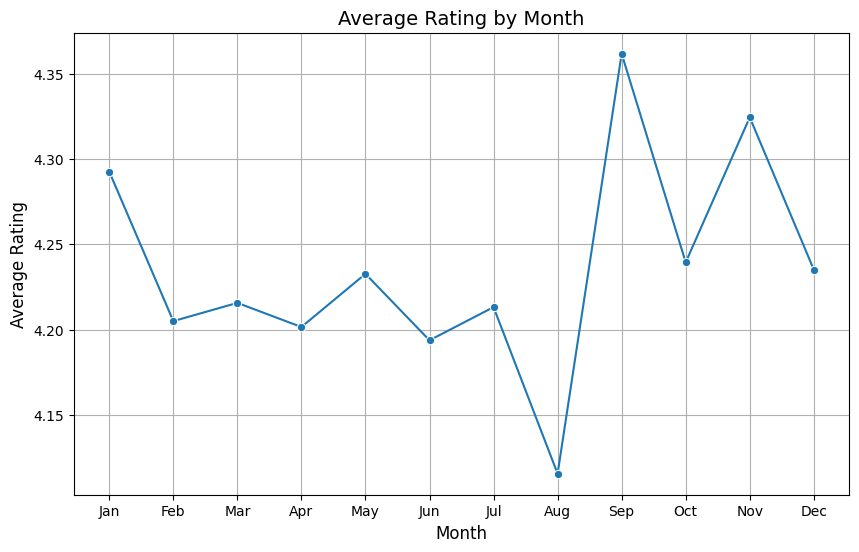

In [ ]:
plt.figure(figsize=(10, 6))
monthly_avg_rating_simple = disney_land_data.groupby('Month_rev')['Rating'].mean()
sns.lineplot(x=monthly_avg_rating_simple.index, y=monthly_avg_rating_simple.values, marker='o')
plt.title('Average Rating by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


**Interpretation** : The average rating stayed steady from January to July, dipped to 4.0 in August, then peaked at 4.37 in September. After that, it stabilized around 4.27 for the rest of the year. Overall, ratings ranged between 4.0 and 4.37.

### **Distribution : Skewness & Kurtosis**

💡 The following part of the code is a function that calculates the distribution metrics (Skewness and Kurtosis) for each column.

Such measures are used to describe the **spread and height** of our normal distribution.

In [ ]:
# Function to calculate distribution metrics (skewness and kurtosis)
def distribution_metrics(disney_land_data, column):
    column_skewness = disney_land_data[column].skew()
    column_kurtosis = disney_land_data[column].kurtosis()
    return {
        "Skewness": column_skewness,
        "Kurtosis": column_kurtosis
    }

Now we will be calling our 3 numerical columns (using a for loop) in that function and put the result in a dataframe.

In [ ]:
distribution_dict = {}
for column in numerical_columns:
  distribution_dict[column] = distribution_metrics(disney_land_data, column)

distribution_df = pd.DataFrame(distribution_dict).T
print("\nMetrics DataFrame:\n")
print(distribution_df)


Metrics DataFrame:

           Skewness  Kurtosis
Rating    -1.408542  1.330119
Month_rev -0.064245 -1.093593
Year_rev  -0.118542 -0.865269


The skewness is negative for the 3 variables, so the data is **left skewed** for each of the Rating, Month_rev and Year_rev.

The Kurtosis is less than 3 for the variables, so we have light tails => fewer outliers for each of the Rating, Month_rev and Year_rev. The type of kurtosis is **Platykurtic**.

### **Visualization of distribution trends 📈 Boxplot, Histogram, KDE Plot**

💡 The following part of the code plots the histogram, boxplot and KDE plot. We will use these plots to have a more clear idea on our normal distribution.

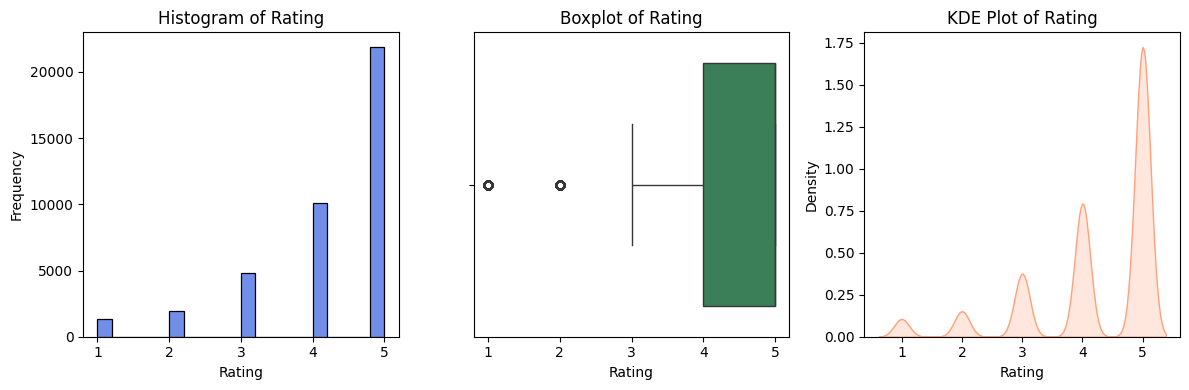

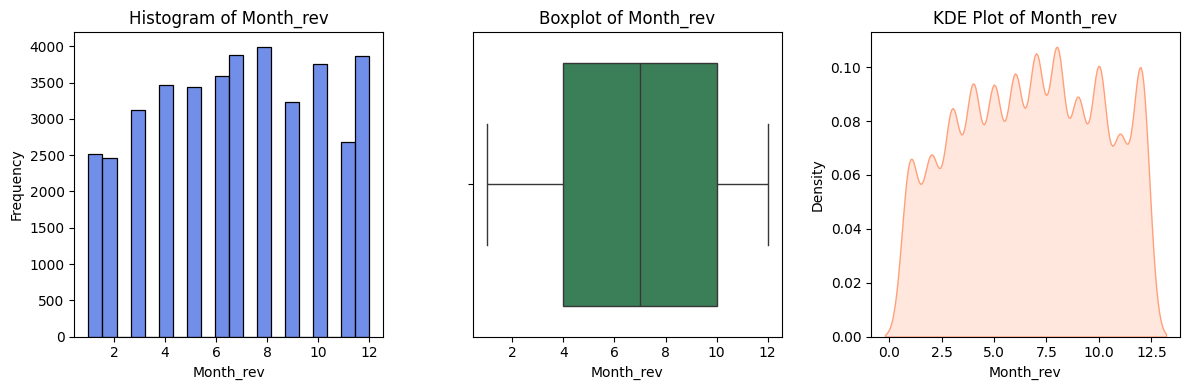

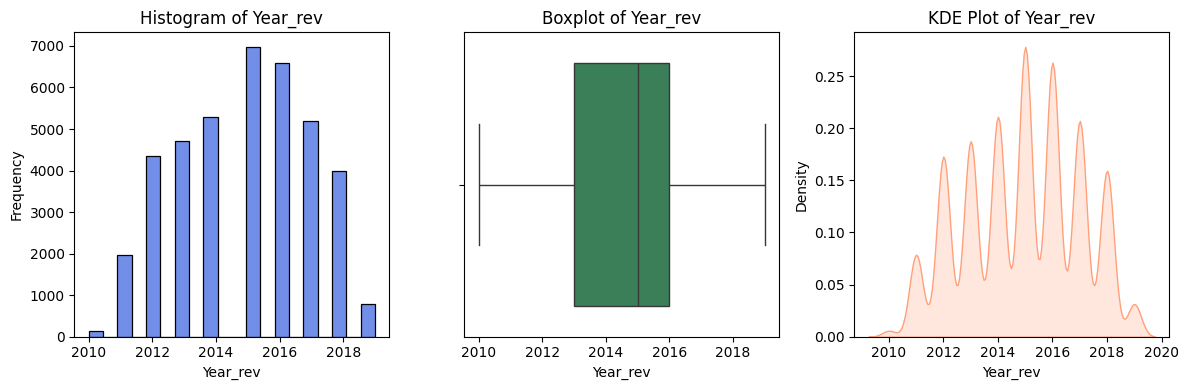

In [ ]:
# Histogram, Boxplot, and KDE Plot for distribution analysis
columns_to_plot = ["Rating", "Month_rev", "Year_rev"]

for column in columns_to_plot:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(disney_land_data[column].dropna(), kde=False, bins=20, color="RoyalBlue")
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=disney_land_data[column].dropna(), color="SeaGreen")
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

    # KDE Plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(disney_land_data[column].dropna(), fill=True, color="LightSalmon")
    plt.title(f"KDE Plot of {column}")
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()


#### **Interpretation :**

##### **Rating :**

**Histogram** : The data is skewed to the left, with most frequencies concentrated around the 5 out of 5 rating. there are way fewer observations with a 1 to 4 out of 5 rating. This indicates high satisfaction among the majority of respondents.

**Boxplot** : The box plot shows the presence of few outliers below 3. The median is at 5, confirming the concentration of high ratings. The interquartile range (IQR) is between 4 and 5, indicating most ratings are very positive.

**KDE Plot** : The density curve shows a peak in the 5 out of 5 rating indicating the high frequency followed by smaller peaks in each other rating. This supports the histogram's findings.

##### **Month_rev :**

**Histogram** : The histogram shows that ratings are distributed fairly evenly across the months with peaks around months 6 to 8 and then month 12. These peaks suggest higher activity which could align with seasonal trends.

**Boxplot** : The data is uniformly distributed with no outliers.

**KDE Plot** : The density is relatively flat but slightly higher during months 6 to 8 and then month 12, supporting the histogram observation.

##### **Year_rev :**

**Histogram** : The histogram shows that most reviews were concentrated between 2014 and 2016, with a peak in 2015.

**Boxplot** : The box is centered between 2014 and 2016, confirming these as the years with the majority of reviews, and showing no significant outliers.

**KDE Plot** : The density peaks sharply around 2015, emphasizing the year with the highest review activity, while reviews in the beginning and end of the decade were not frequent.

## **Descriptive Statistics for Categorical Variables**

Categorical variables to work on : Reviewer_Location, Branch

In [ ]:
disney_land_data.head()

,Review_ID,Rating,Day_rev,Month_rev,Year_rev,Reviewer_Location,Review_Text,Branch,Sentiment
0,670772142,4,1,4,2019,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,0.243981
1,670682799,4,1,5,2019,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,0.236131
2,670623270,4,1,4,2019,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,0.160498
3,670607911,4,1,4,2019,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,0.189286
4,670607296,4,1,4,2019,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,0.266667


In [ ]:
disney_land_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40014 entries, 0 to 40013
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Review_ID          40014 non-null  int64  
 1   Rating             40014 non-null  int64  
 2   Day_rev            40014 non-null  int64  
 3   Month_rev          40014 non-null  int64  
 4   Year_rev           40014 non-null  int64  
 5   Reviewer_Location  40014 non-null  object 
 6   Review_Text        40014 non-null  object 
 7   Branch             40014 non-null  object 
 8   Sentiment          40014 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 2.7+ MB


💡 The following part of the code will show us :  

*   Frequency Distribution
*   Relative Frequency
*   Mode
*   Number of Unique Categories
*   Unique Categories

For the categorical variables 'Reviewer_Location' and 'Branch'.





**Frequency**

In [ ]:
# Frequency distribution for 'Reviewer_Location' and 'Branch'
location_frequency = disney_land_data['Reviewer_Location'].value_counts()
branch_frequency = disney_land_data['Branch'].value_counts()

location_frequency, branch_frequency

(Reviewer_Location
 United States               13508
 United Kingdom               9115
 Australia                    4408
 Canada                       2113
 India                        1469
                             ...  
 Turks and Caicos Islands        1
 Timor-Leste                     1
 South Sudan                     1
 Curaçao                         1
 Andorra                         1
 Name: count, Length: 162, dtype: int64,
 Branch
 Disneyland_California    18192
 Disneyland_Paris         12691
 Disneyland_HongKong       9131
 Name: count, dtype: int64)

In [ ]:
# Bar plots for 'Reviewer_Location' and 'Branch' frequency distribution
def plot_frequency_distribution(data, column_name):
  top_10_values = data[column_name].value_counts().nlargest(10).index
  filtered_data = data[data[column_name].isin(top_10_values)]

  filtered_data[column_name].value_counts().plot(kind='bar', color='skyblue', title=f"{column_name} Frequency Distribution")
  plt.xlabel(column_name)
  plt.ylabel('Frequency')
  plt.show()

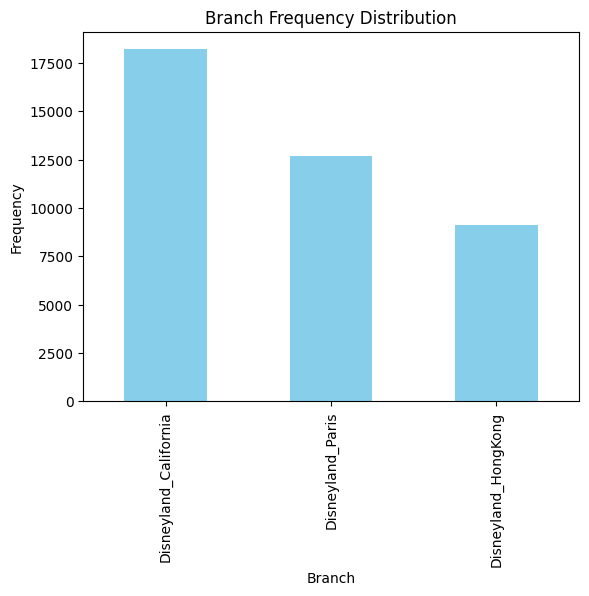

In [ ]:
plot_frequency_distribution(disney_land_data, 'Branch')

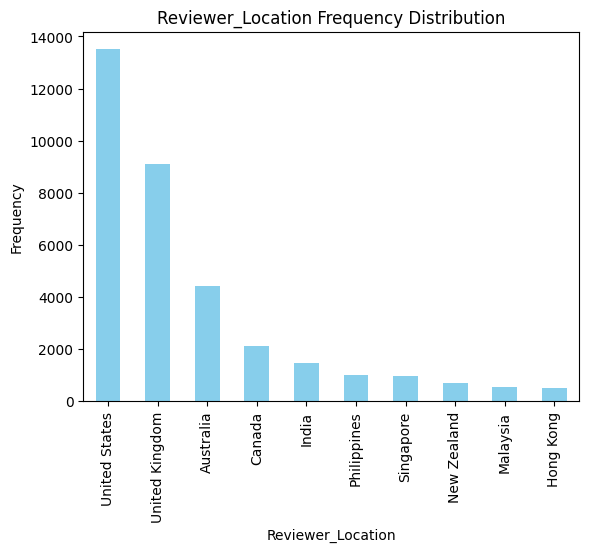

In [ ]:
plot_frequency_distribution(disney_land_data, 'Reviewer_Location')

**Remark** : For the 'Reviewer_Location' variable, we chose to plot only the first 10 locations since we have many unique locations.

**Proportion**

In [ ]:
# Proportion for each categorical column
location_proportion = disney_land_data['Reviewer_Location'].value_counts(normalize=True)
branch_proportion = disney_land_data['Branch'].value_counts(normalize=True)

location_proportion, branch_proportion

(Reviewer_Location
 United States               0.337582
 United Kingdom              0.227795
 Australia                   0.110161
 Canada                      0.052807
 India                       0.036712
                               ...   
 Turks and Caicos Islands    0.000025
 Timor-Leste                 0.000025
 South Sudan                 0.000025
 Curaçao                     0.000025
 Andorra                     0.000025
 Name: proportion, Length: 162, dtype: float64,
 Branch
 Disneyland_California    0.454641
 Disneyland_Paris         0.317164
 Disneyland_HongKong      0.228195
 Name: proportion, dtype: float64)

In [ ]:
def plot_prop_distribution(data, column_name):
  top_10_values = data[column_name].value_counts().nlargest(10).index
  filtered_data = data[data[column_name].isin(top_10_values)]

  # Calculate proportions within the filtered data ('Branch' and 'Reviewer_Location')
  proportions = filtered_data[column_name].value_counts(normalize=True)

  proportions.plot(kind='bar', color='skyblue', title=f"{column_name} Proportion Distribution")
  plt.xlabel(column_name)
  plt.ylabel('Proportion')
  plt.show()

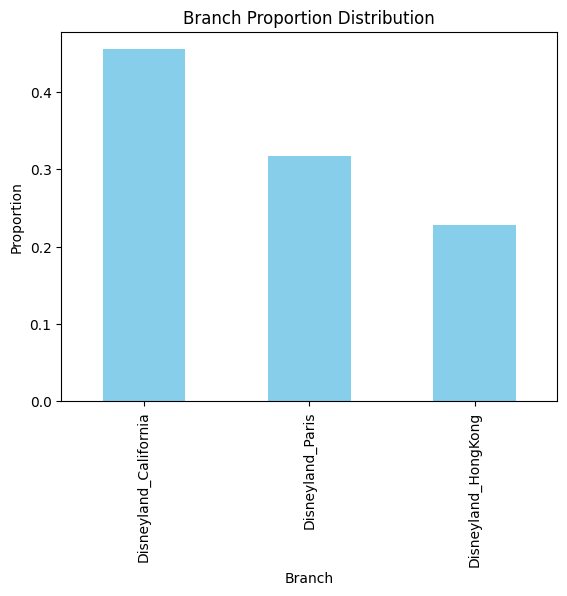

In [ ]:
plot_prop_distribution(disney_land_data, 'Branch')

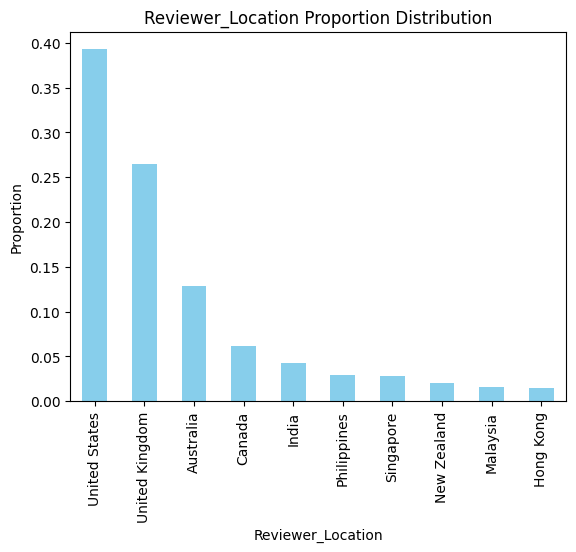

In [ ]:
plot_prop_distribution(disney_land_data, 'Reviewer_Location')

**Remark** : For the 'Reviewer_Location' variable, we chose to plot only the first 10 locations since we have many unique locations.

**Interpretation :** The United States had the highest number of reviewers with more than 13000 reviewers which represents almost 40% of the whole sample, followed by the United Kingdom (approximately 25%) and then Australia (around 13%).

The Disney Land California branch had the highest number of reviews with more than 17500 reviews which represents around 45% of the whole sample, followed by the Paris Branch (approximately 32%) and then the Hong Kong Branch (around 23%).

**Unique Categories**

In [ ]:
# Unique categories
unique_rev_loc = disney_land_data['Reviewer_Location'].unique()
unique_branch = disney_land_data['Branch'].unique()
unique_rev_loc, unique_branch

(array(['Australia', 'Philippines', 'United Arab Emirates',
        'United Kingdom', 'Singapore', 'India', 'Malaysia',
        'United States', 'Canada', 'Myanmar (Burma)', 'Hong Kong', 'China',
        'Indonesia', 'Qatar', 'New Zealand', 'Sri Lanka', 'Uganda',
        'Thailand', 'Austria', 'South Africa', 'Saudi Arabia', 'Japan',
        'Israel', 'South Korea', 'Turkey', 'Macau', 'Egypt', 'Mexico',
        'Mauritius', 'Sweden', 'Brazil', 'Kenya', 'Vietnam', 'Portugal',
        'Cambodia', 'Zambia', 'Croatia', 'France', 'Taiwan', 'Oman',
        'Colombia', 'Norway', 'Kuwait', 'Netherlands', 'Barbados',
        'Finland', 'Bosnia and Herzegovina', 'Brunei', 'Bahrain',
        'Maldives', 'Ireland', 'Russia', 'Romania',
        'Northern Mariana Islands', 'Germany', 'Chile', 'Isle of Man',
        'Pakistan', 'Ukraine', 'Greece', 'Switzerland', 'Spain', 'Estonia',
        "Côte d'Ivoire", 'Guam', 'Bangladesh', 'Belgium', 'Italy',
        'Botswana', 'Denmark', 'Argentina', 'Peru', 

**Number of Unique Categories**




In [ ]:
# Number of Unique categories
nunique_rev_loc = disney_land_data['Reviewer_Location'].nunique()
nunique_branch = disney_land_data['Branch'].nunique()

nunique_rev_loc, nunique_branch

(162, 3)

We have 162 unique locations and 3 unique branches.

**Mode**

In [ ]:
# Mode for each categorical column
mode_rev_loc = disney_land_data['Reviewer_Location'].mode()
mode_branch = disney_land_data['Branch'].mode()

mode_rev_loc, mode_branch

(0    United States
 Name: Reviewer_Location, dtype: object,
 0    Disneyland_California
 Name: Branch, dtype: object)

**Cross-Tabulation**

In [ ]:
# Cross tabulation between Reviewer Location and Branch (Top 10 locations)
top_10_locations = disney_land_data['Reviewer_Location'].value_counts().nlargest(10).index
location_branch_crosstab_top10 = pd.crosstab(
    disney_land_data[disney_land_data['Reviewer_Location'].isin(top_10_locations)]['Reviewer_Location'],
    disney_land_data['Branch']
)

location_branch_crosstab_top10


Branch,Disneyland_California,Disneyland_HongKong,Disneyland_Paris
Reviewer_Location,,,
Australia,2323,1544,541
Canada,1751,190,172
Hong Kong,10,491,14
India,134,1050,285
Malaysia,30,484,46
New Zealand,502,154,58
Philippines,53,949,22
Singapore,86,795,87
United Kingdom,965,701,7449


**Interpretation :** The Cross tabulation between the Reviewer Location and the Branch shows that American, Canadian, Australian and New Zealand citizens had most of their visits to California Disney Land, while Asians visited the Hong Kong Branch more often and British citizens chose instead to visit mainly the Paris Branch

**Remark** : For the 'Reviewer_Location' variable, we chose to plot only the first 10 locations since we have many unique locations.

### **Review_Text Analysis** (text data)

Since the "Review_text" variable contains unstructured data, the previous calculated metrics won't give many insights concerning given reviews. Therefore, we will proceed to techniques that help identify patterns, extract sentiments and uncover trends for such textual data in order to derive meaningful insights.

**Analysis steps :**

1.   Word Frequency Analysis
1.   Sentiment Analysis
2.   N-gram Analysis

**1.   Word Frequency Analysis**





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Most Common Words: [('park', 41281), ('disney', 33582), ('rides', 32110), ('disneyland', 30305), ('time', 27038), ('day', 26289), ('get', 21159), ('go', 18431), ('one', 17691), ('ride', 16234), ('great', 15067), ('would', 14289), ('food', 13107), ('kids', 12911), ('place', 12526), ('good', 12005), ('really', 11317), ('visit', 11083), ('like', 10936), ('see', 10787)]


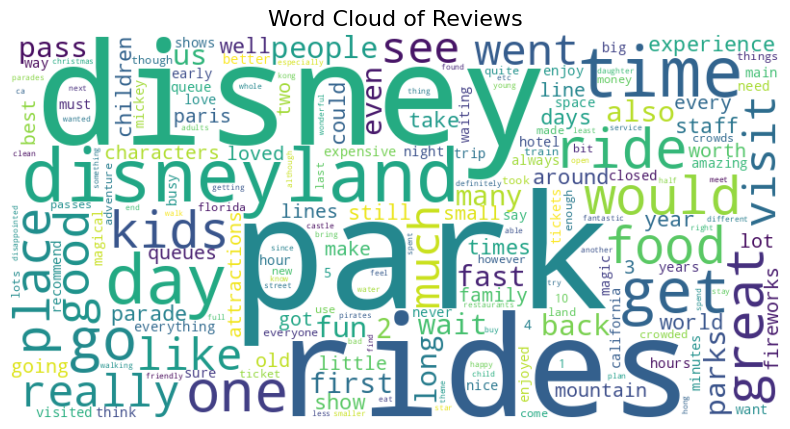

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter
import nltk
import matplotlib.pyplot as plt

# Ensure you have nltk's stopwords
nltk.download('stopwords')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab') # This line is added to download the required resource.
stop_words = set(stopwords.words('english'))

# Preprocess Review_Text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    words = nltk.word_tokenize(text)  # Tokenize
    words = [word for word in words if word.isalnum()]  # Remove punctuation
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

# Combine all reviews into a single text
all_reviews = " ".join(disney_land_data['Review_Text'].dropna())

# Preprocess all reviews
words = preprocess_text(all_reviews)

# Word Frequency
word_freq = Counter(words)
most_common_words = word_freq.most_common(20)
print("Most Common Words:", most_common_words)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews', fontsize=16)
plt.show()


**Interpretation :** The most repeated words according to the Word Cloud of Reviews are “rides”, “food”, “kids”, “great”, “good”. All these words emphasize the abundance of positive reviews given. Negative expressions such as “waiting”, “queue”, “line” and “crowded” are way less present which indicates that visitors are overall satisfied across all Disney Land branches.

**2.   Sentiment Analysis**




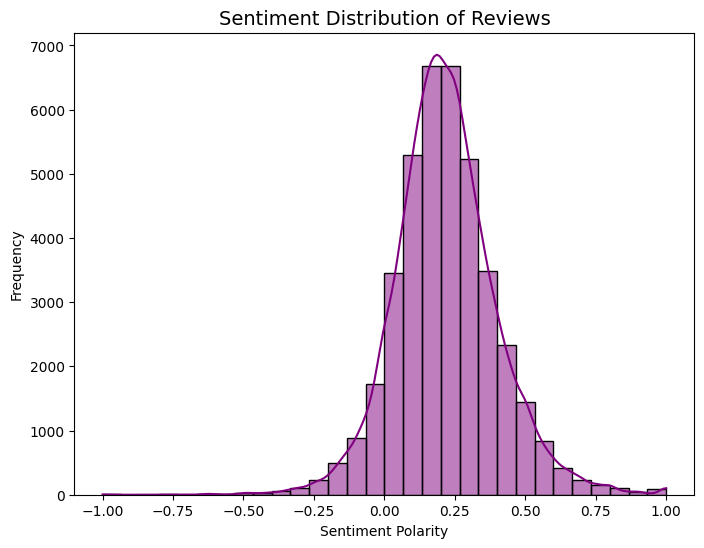

In [ ]:
from textblob import TextBlob

# Function to calculate sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis
disney_land_data['Sentiment'] = disney_land_data['Review_Text'].dropna().apply(get_sentiment)

# Sentiment Distribution Plot
plt.figure(figsize=(8, 6))
sns.histplot(disney_land_data['Sentiment'], bins=30, kde=True, color='purple')
plt.title('Sentiment Distribution of Reviews', fontsize=14)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


**Interpretation :** The sentiment polarity distribution shows that most reviews are neutral to slightly positive, with the majority of sentiment scores concentrated around 0.2. The data follows a bell-shaped curve, indicating a normal distribution, with fewer reviews expressing extreme negative or positive sentiments. Overall, while reviews are generally positive, there is room to explore what drives the less frequent negative reviews to improve customer satisfaction.

**3.   N-gram Analysis**




Most Common Bigrams: [(('fast', 'pass'), 4988), (('space', 'mountain'), 3333), (('year', 'old'), 3112), (('hong', 'kong'), 3057), (('disneyland', 'paris'), 2782), (('one', 'day'), 2720), (('disney', 'world'), 2672), (('fast', 'passes'), 2296), (('great', 'time'), 2085), (('california', 'adventure'), 2078), (('go', 'back'), 2062), (('small', 'world'), 2060), (('main', 'street'), 2047), (('first', 'time'), 1863), (('make', 'sure'), 1861), (('indiana', 'jones'), 1796), (('theme', 'park'), 1770), (('thunder', 'mountain'), 1722), (('disneyland', 'park'), 1698), (('place', 'earth'), 1623)]


<ipython-input-202-5b04df573ec5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bigram_counts, y=bigram_words, palette="Blues_d")


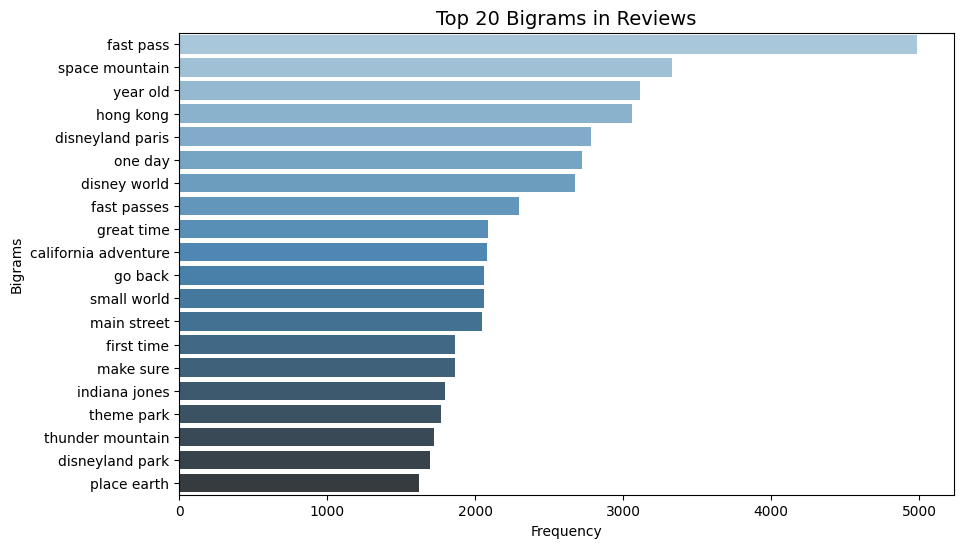

In [ ]:
from nltk.util import ngrams
from collections import Counter

# Generate bigrams
bigrams = list(ngrams(words, 2))

# Most common bigrams
bigram_freq = Counter(bigrams)
most_common_bigrams = bigram_freq.most_common(20)
print("Most Common Bigrams:", most_common_bigrams)

# Plot top bigrams
bigram_words = [' '.join(bigram) for bigram, _ in most_common_bigrams]
bigram_counts = [count for _, count in most_common_bigrams]

plt.figure(figsize=(10, 6))
sns.barplot(x=bigram_counts, y=bigram_words, palette="Blues_d")
plt.title('Top 20 Bigrams in Reviews', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()

**Interpretation :** The top 20 Bigrams in Review Histogram shows that the most repeated bigram is “fast pass” with a frequency of  almost 5000 followed by “space mountain” and “year old”. Overall, the top 20 bigrams reveal that the reviews given are overall positive, with “fast pass” emphasizing on the effective management of waiting times